In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the data

In [357]:
data= pd.read_csv('/content/healthcare-dataset-stroke-data (1).csv')

In [316]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [205]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [206]:
data.shape

(5110, 12)

# Data Analysis

# 1- Which gender has a higher risk of stroke?
# 2- Does having heart disease increase Stroke risk?
# 3- Does somkers have a higher risk of stroke?
# 4- Does having hypertension and heart diease increase the risk of stroke?
# 5- Does the risk of stroke increase with the age?
# 6- Does glucose level and BMI have a high impact on the risk of stroke?
# 7- Are older married people more a risk of stroke?
# 8- Does Residence type affcet the stroke risk?
# 9- which work_type have high impace on the stroke risk?


# Which gender has a higher risk of stroke?

In [207]:
# Which gender has a higher risk of stroke?  MALE
new_frame1 = data.groupby(['gender'])['stroke'].mean()
new_frame1


,stroke
gender,
Female,0.047094
Male,0.051064
Other,0.000000


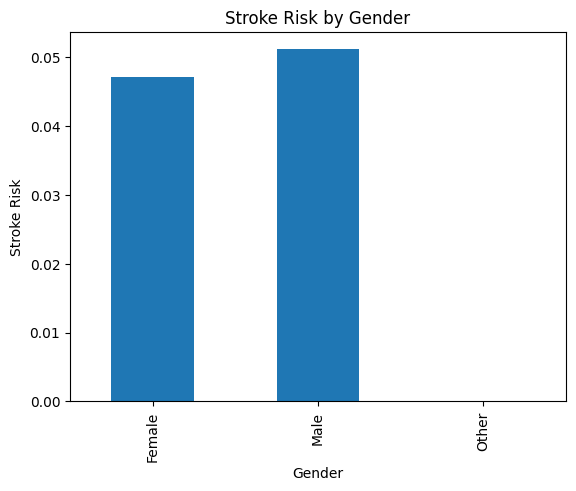

In [208]:
new_frame1.plot(kind='bar')
plt.title('Stroke Risk by Gender')
plt.xlabel('Gender')
plt.ylabel('Stroke Risk')
plt.show()

# Does having heart disease increase Stroke risk?

In [209]:
#Does having heart disease increase Stroke risk?  yes
new_frame2 = data.groupby(['heart_disease'])['stroke'].mean()
new_frame2

,stroke
heart_disease,
0,0.041787
1,0.170290


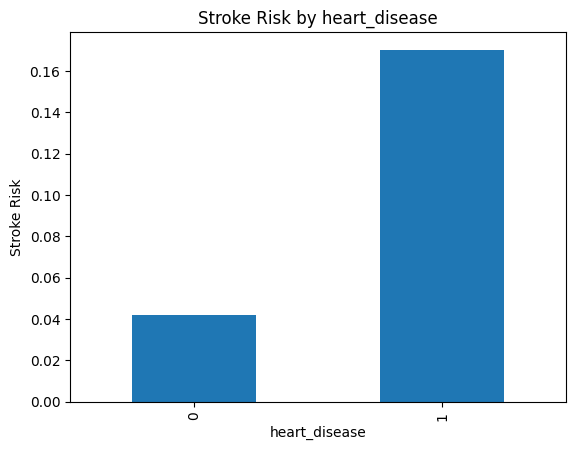

In [210]:
new_frame2.plot(kind='bar')
plt.title('Stroke Risk by heart_disease')
plt.xlabel('heart_disease')
plt.ylabel('Stroke Risk')
plt.show()

# #Does somkers have a higher risk of stroke?


In [211]:
 #Does somkers have a higher risk of stroke?  yes but the effect is small

new_frame3= data.groupby(['smoking_status'])['stroke'].mean()
new_frame3


,stroke
smoking_status,
Unknown,0.030440
formerly smoked,0.079096
never smoked,0.047569
smokes,0.053232


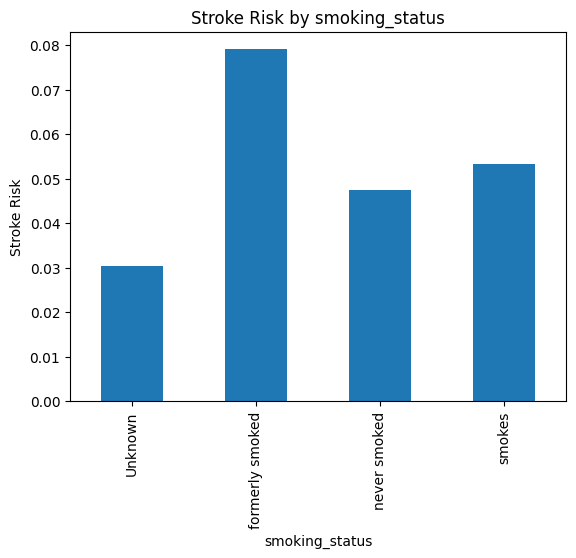

In [212]:
new_frame3.plot(kind='bar')
plt.title('Stroke Risk by smoking_status')
plt.xlabel('smoking_status')
plt.ylabel('Stroke Risk')
plt.show()

# Does having hypertension and heart diease increase the risk of stroke?


In [331]:
## Does having hypertension and heart diease increase the risk of stroke?  YES

def hypertension_heart_disease_link(row):
    if row['hypertension'] == 1 and row['heart_disease'] == 1:
        return 'high_link'
    else:
        return 'no_lonk'

In [332]:
data['hypertension_heart_disease_link']=data.apply(hypertension_heart_disease_link,axis=1)
data['hypertension_heart_disease_link'].value_counts()

,count
hypertension_heart_disease_link,
no_lonk,5046
high_link,64


In [333]:
new_frame4 = data.groupby(['hypertension_heart_disease_link'])['stroke'].mean()
new_frame4


,stroke
hypertension_heart_disease_link,
high_link,0.203125
no_lonk,0.046770


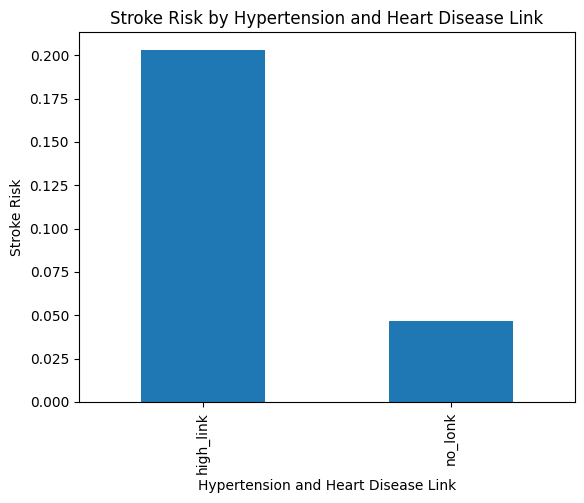

In [216]:
new_frame4.plot(kind='bar')
plt.title('Stroke Risk by Hypertension and Heart Disease Link')
plt.xlabel('Hypertension and Heart Disease Link')
plt.ylabel('Stroke Risk')
plt.show()

# Does the risk of stroke increase with the age?


In [217]:
#Does the risk of stroke increase with the age?  yes

from scipy.stats import pearsonr

#Compute correlation
corr, p_value = pearsonr(data['age'], data['stroke'])
print(f"Correlation between age and stroke risk: {corr:.3f}")
print(f"P-value: {p_value:.3e}")

if corr > 0:
    print("➡️ As age increases, stroke risk increases.")
elif corr < 0:
    print("➡️ As age increases, stroke risk increases.")
else:
    print("➡️ No clear relationship between age and stroke risk.")

Correlation between age and stroke risk: 0.245
P-value: 7.031e-71
➡️ As age increases, stroke risk increases.


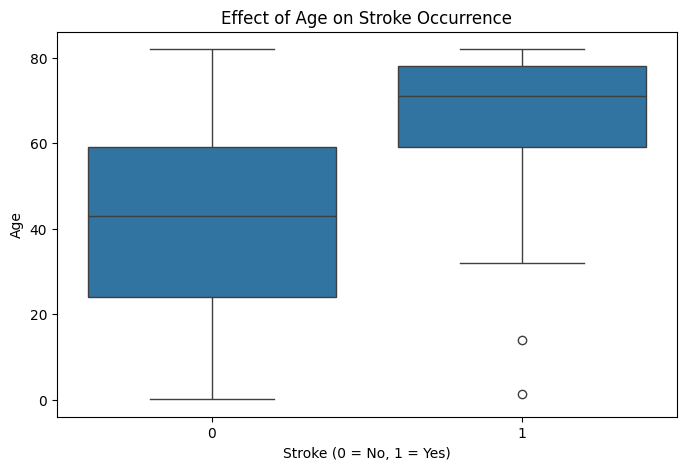

In [218]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='stroke', y='age', data=data)
plt.title("Effect of Age on Stroke Occurrence")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# Does glucose level and BMI have a high impact on the risk of stroke?

In [334]:
 # Does glucose level and BMI have a high impact on the risk of stroke? yes but not high

def glucose_bmi_link(row):
  if row['bmi'] >= data['bmi'].mean() and row['avg_glucose_level'] >= data['avg_glucose_level'].mean():
        return 'high_link'
  else:
      return 'no_lonk'

In [335]:
data['glucose_bmi_link']=data.apply(glucose_bmi_link,axis=1)
data['glucose_bmi_link'].value_counts()

,count
glucose_bmi_link,
no_lonk,4324
high_link,786


In [336]:
new_frame5= data.groupby(['glucose_bmi_link'])['stroke'].mean()
new_frame5

,stroke
glucose_bmi_link,
high_link,0.085242
no_lonk,0.042091


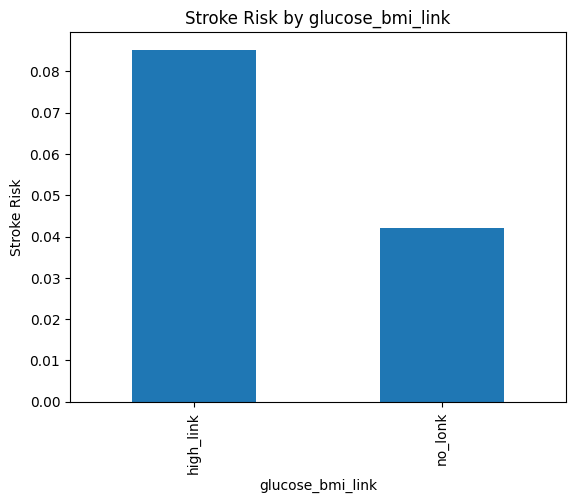

In [222]:
new_frame5.plot(kind='bar')
plt.title('Stroke Risk by glucose_bmi_link')
plt.xlabel('glucose_bmi_link')
plt.ylabel('Stroke Risk')
plt.show()

# Are older married people more a risk of stroke?

In [337]:
#Are older married people more a risk of stroke? "As age increases for married people, stroke risk increases"

# convert 'ever_married' to numerical data to use Pearson correlation
data['ever_married'] = data['ever_married'].replace({'Yes': 1, 'No': 0})

#create the relation betwwen 'ever-married' and 'age'
data['age_married_releation']= data['ever_married'] * data['age']

#compute the correlation
corr, p_value = pearsonr(data['age_married_releation'], data['stroke'])
print(f"Correlation between age and stroke risk: {corr:.3f}")
print(f"P-value: {p_value:.3e}")

Correlation between age and stroke risk: 0.193
P-value: 5.548e-44


In [338]:
if corr > 0:
    print(" As age increases for married people, stroke risk increases.")
elif corr < 0:
    print(" As age increases for married people, stroke risk decreases.")
else:
    print(" No clear relationship between age * married and stroke risk.")

 As age increases for married people, stroke risk increases.


# Does Residence type affect the stroke risk?

In [225]:
#Does Residence type affect the stroke risk?  Effect is  extremely weak

new_frame6= data.groupby(['Residence_type'])['stroke'].mean()
new_frame6

,stroke
Residence_type,
Rural,0.045346
Urban,0.052003


# which work_type have high impace on the stroke risk?

In [226]:
# which work_type have high impace on the stroke risk?   Self-employed

new_frame7= data.groupby(['work_type'])['stroke'].mean()
new_frame7

,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


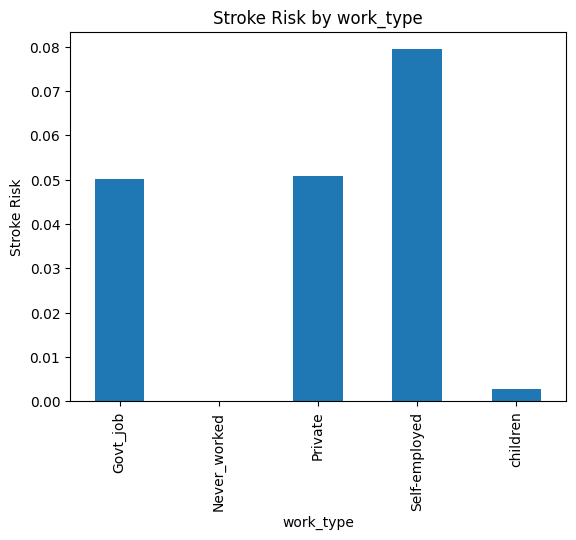

In [227]:
new_frame7.plot(kind='bar')
plt.title('Stroke Risk by work_type')
plt.xlabel('work_type')
plt.ylabel('Stroke Risk')
plt.show()

# **preprocessing**

# removed id column

In [358]:
data.drop('id', axis=1, inplace=True)

# Removed Residence cloumn due to its low impact

In [359]:
data.drop('Residence_type', axis=1, inplace=True)

# Removed the columns created in the analysis

In [339]:
data.drop('hypertension_heart_disease_link', axis=1, inplace=True)
data.drop('glucose_bmi_link', axis=1, inplace=True)
data.drop('age_married_releation', axis=1, inplace=True)

# Check if there are missing values

In [360]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
avg_glucose_level,0
bmi,201
smoking_status,0
stroke,0


# Deleted rows with missing values

In [361]:
data= data.dropna()

# Check dupes

In [362]:
print(data.duplicated().any())

False


# split the data into features and label

In [342]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,186.21,29.0,formerly smoked,1


In [363]:
x= data.iloc[:, 0:9]
y=data.iloc[:, 9]

In [364]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked


# Text data replacing

In [355]:
x['smoking_status']=x['smoking_status'].replace({'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3})
x['ever_married']= x['ever_married'].replace({'Yes': 1, 'No': 0})
x['work_type']= x['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})


/tmp/ipython-input-3310507255.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['smoking_status']=x['smoking_status'].replace({'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3})
/tmp/ipython-input-3310507255.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['work_type']= x['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})


In [356]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,0,228.69,36.6,2
2,0,80.0,0,1,1,0,105.92,32.5,0
3,1,49.0,0,0,1,0,171.23,34.4,3
4,1,79.0,1,0,1,1,174.12,24.0,0
5,0,81.0,0,0,1,0,186.21,29.0,2


In [349]:
x['gender']= x['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})


/tmp/ipython-input-178124768.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['gender']= x['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})


# scaling

In [367]:
from sklearn.preprocessing import MinMaxScaler


In [368]:
scaler_x= MinMaxScaler(feature_range=(0,1))


In [369]:
x= scaler_x.fit_transform(x)


# Split the data into training and test sets

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Apply K Fold Cross Validation
# I will expreriment with three


1.   DT
2.   RF


1.   XGB

# Perform Hyperparameter tuning with RandomizedsearchCV






In [264]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Apply  K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#  Define the models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Define parameter sidtributions for each model
param_dists = {
    'DecisionTree': {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    }
}

# Run Rondomized search for each model
results = {}
for name, model in models.items():
    print(f"Running RandomizedSearchCV for {name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dists[name],
        n_iter=10,         # Num of trials
        cv=kf,             #  K-Fold Cross Validation using
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    search.fit(x_train, y_train)
    results[name] = {
        'best_params': search.best_params_,
        'best_score': search.best_score_
    }

# Display the result
for name, res in results.items():
    print(f"{name}:")
    print(f" Best Params: {res['best_params']}")
    print(f" Best CV Score: {res['best_score']}\n")






Running RandomizedSearchCV for DecisionTree...
Running RandomizedSearchCV for RandomForest...
Running RandomizedSearchCV for XGBoost...
DecisionTree:
 Best Params: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5}
 Best CV Score: 0.9564574318082366

RandomForest:
 Best Params: {'n_estimators': 50, 'min_samples_leaf': 2, 'max_depth': None}
 Best CV Score: 0.9607866971361891

XGBoost:
 Best Params: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01}
 Best CV Score: 0.9602771429960617



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:22:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Classification Report for each model

Classification report for DecisionTree:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.94      0.92       982



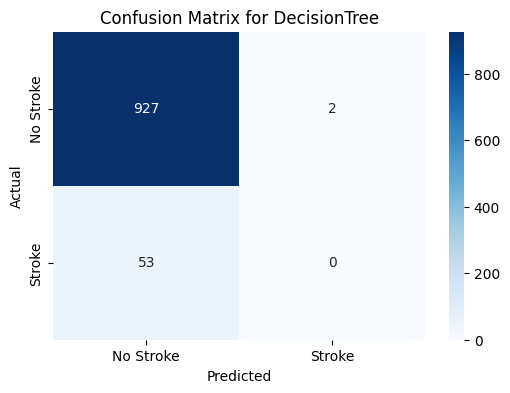

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



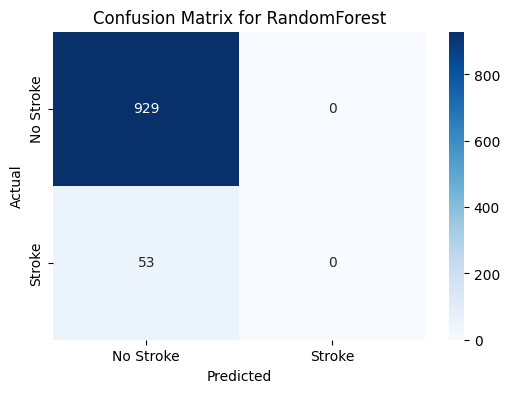

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:22:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

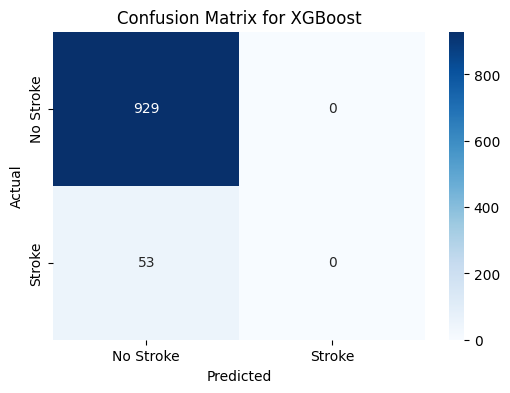


Summary of Model Performance:


,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTree,0.943992,0.894866,0.943992,0.918773
1,RandomForest,0.946029,0.894970,0.946029,0.919791
2,XGBoost,0.946029,0.894970,0.946029,0.919791


In [265]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create instances of the best models using the parameters from RandomizedSearchCV
best_models = {
    'DecisionTree': DecisionTreeClassifier(**results['DecisionTree']['best_params']),
    'RandomForest': RandomForestClassifier(**results['RandomForest']['best_params']),
    'XGBoost': XGBClassifier(**results['XGBoost']['best_params'], use_label_encoder=False, eval_metric='logloss')
}

# Create a dictionary to store the results
results_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Display classification report and store metrics for each model
for name, model in best_models.items():
    # Train the model on the full training data
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results_dict['Model'].append(name)
    results_dict['Accuracy'].append(report['accuracy'])
    results_dict['Precision'].append(report['weighted avg']['precision'])
    results_dict['Recall'].append(report['weighted avg']['recall'])
    results_dict['F1-Score'].append(report['weighted avg']['f1-score'])

    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Create a pandas DataFrame from the results dictionary
results_df = pd.DataFrame(results_dict)

# Display the results DataFrame
print("\nSummary of Model Performance:")
display(results_df)

# Apply SMOTE

In [374]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_new, y_train_new = smote.fit_resample(x_train, y_train)


In [277]:
for name, model in best_models.items():
    # Train the model on the resampled training data
    model.fit(x_train_new, y_train_new)
    y_pred = model.predict(x_test)

    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred))


Classification report for DecisionTree:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       929
           1       0.15      0.68      0.24        53

    accuracy                           0.77       982
   macro avg       0.56      0.73      0.55       982
weighted avg       0.93      0.77      0.83       982

Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       929
           1       0.15      0.34      0.21        53

    accuracy                           0.86       982
   macro avg       0.55      0.61      0.56       982
weighted avg       0.92      0.86      0.88       982

Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       929
           1       0.17      0.40      0.24        53

    accuracy                           0.86       982
   macro avg 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:39:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Try to edit hyperparameter to get the best accuracy.  

In [283]:
xgb_model = XGBClassifier(
    n_estimators=300,       # Number of trees
    max_depth=2,            # Shallower trees to reduce overfitting
    learning_rate=0.02,     # Lower learning rate for better generalization

    scale_pos_weight=(len(y_train_new[y_train_new==0]) / len(y_train_new[y_train_new==1])),
                            # Balance the minority class (class 1)
    use_label_encoder=False,
    eval_metric='logloss',  # Evaluation metric
    random_state=42
)

# 4️⃣ Train the model on SMOTE-balanced data
xgb_model.fit(x_train_new, y_train_new)

# 5️⃣ Predict on test set and print classification report
y_pred = xgb_model.predict(x_test)
print("Classification report for XGBoost after SMOTE and hyperparameter tuning:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:50:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification report for XGBoost after SMOTE and hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       929
           1       0.14      0.66      0.23        53

    accuracy                           0.77       982
   macro avg       0.56      0.72      0.55       982
weighted avg       0.93      0.77      0.83       982



# experiment other models



1.   Logistic regression

2.   SVC


---



In [365]:
# replac non-ordinal features by one-hot encoding

x=pd.get_dummies(x)

In [366]:
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,False,True,False,False,True,False,False,True,False,False,False,True,False,False
2,80.0,0,1,105.92,32.5,False,True,False,False,True,False,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,True,False,False,False,True,False,False,True,False,False,False,False,False,True
4,79.0,1,0,174.12,24.0,True,False,False,False,True,False,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,False,True,False,False,True,False,False,True,False,False,False,True,False,False


# Classification Report for each model before SMOTE

In [373]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Define models:
models = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVC': SVC(class_weight='balanced', probability=True, random_state=42)
}


#Scale features for SVC only
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#train each model and display classification report
for name, model in models.items():
    if name == 'SVC':
        model.fit(x_train_scaled, y_train)        # Use scaled data for SVC
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)               # Logistic Regression can use original dummies
        y_pred = model.predict(x_test)

    print(f"Classification report for {name} without SMOTE:")
    print(classification_report(y_test, y_pred))





Classification report for LogisticRegression without SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.79      0.56       982
weighted avg       0.94      0.75      0.82       982

Classification report for SVC without SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       929
           1       0.14      0.60      0.22        53

    accuracy                           0.77       982
   macro avg       0.55      0.69      0.55       982
weighted avg       0.93      0.77      0.83       982



# # Classification Report for each model after SMOTE

In [376]:
#Scale the features for SVC
scaler = StandardScaler()
x_train_new_scaled = scaler.fit_transform(x_train_new)
x_test_scaled = scaler.transform(x_test)

#train each model and display classification report
for name, model in models.items():
    if name == 'SVC':
        model.fit(x_train_new_scaled, y_train_new)
    else:
      model.fit(x_train_new, y_train_new)
    y_pred = model.predict(x_test)

    print(f"Classification report for {name} after SMOTE:")
    print(classification_report(y_test, y_pred))

Classification report for LogisticRegression after SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       929
           1       0.15      0.79      0.25        53

    accuracy                           0.75       982
   macro avg       0.57      0.77      0.55       982
weighted avg       0.94      0.75      0.82       982

Classification report for SVC after SMOTE:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       929
           1       0.05      1.00      0.10        53

    accuracy                           0.05       982
   macro avg       0.03      0.50      0.05       982
weighted avg       0.00      0.05      0.01       982



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



**The best model is Logistic Regression **




# Save the trained Model "Logistic Regression"

In [384]:
import joblib

#save the trained logistic Regression model
joblib.dump(models['LogisticRegression'], 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [391]:
import gradio as gr

# Load saved Logistic Regression model
model = joblib.load("logistic_regression_model.pkl")

# Define all features after preprocessing (without id and Residence_type)
model_features = [
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
    'gender_Female', 'gender_Male',
    'ever_married_No', 'ever_married_Yes',
    'work_type_Private', 'work_type_Self-employed', 'work_type_Govt_job', 'work_type_children', 'work_type_Never_worked',
    'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'smoking_status_Unknown'
]

# Prediction function
def predict(age, hypertension, heart_disease, avg_glucose_level, bmi,
            gender, ever_married, work_type, smoking_status):

    # Create DataFrame
    df = pd.DataFrame([{
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
        'gender': gender,
        'ever_married': ever_married,
        'work_type': work_type,
        'smoking_status': smoking_status
    }])

    # Fill missing values
    df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

    # One-Hot Encode categorical variables
    df = pd.get_dummies(df)

    # Ensure all model features are present
    for col in model_features:
        if col not in df.columns:
            df[col] = 0

    df = df[model_features]  # reorder columns

    # Predict
    pred = model.predict(df)[0]
    proba = model.predict_proba(df)[0][1]

    return {"Prediction": int(pred), "Probability for class 1": float(proba)}

# Define Gradio inputs
inputs = [
    gr.Number(label="age"),
    gr.Number(label="hypertension (0 or 1)"),
    gr.Number(label="heart_disease (0 or 1)"),
    gr.Number(label="avg_glucose_level"),
    gr.Number(label="bmi"),
    gr.Dropdown(label="gender", choices=['Male', 'Female']),
    gr.Dropdown(label="ever_married", choices=['Yes', 'No']),
    gr.Dropdown(label="work_type", choices=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']),
    gr.Dropdown(label="smoking_status", choices=['formerly smoked', 'never smoked', 'smokes', 'Unknown'])
]

# Create Gradio Interface
iface = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs=[gr.Label(num_top_classes=2), gr.Number(label="Probability for class 1")],
    title="Stroke Prediction",
    description="Predicts whether a person will have a stroke (minority class)."
)

iface.launch()



It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7c0e21a20f8c5cd832.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
